# Query 3.1

Import the file 'gold.csv' (you will find this in the intro section to download or in '/Data/gold.csv' if you are using the jupyter notebook), which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled. Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column. Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is a linear function and which is polynomial. (Hint: Plotting a histogram & distplot helps in recognizing the discrepencies in prediction, if any.)

In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv("GOLD.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [6]:
df.set_index('Date',inplace = True)
df

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305


In [7]:
df2 = df.dropna()

In [8]:
df2

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
"Dec 04, 2018",30964,30874,31085,30874,0.08K,0.57%,-31.0,301.615081
"Dec 05, 2018",30926,30830,30970,30825,0.04K,-0.12%,72.0,241.475101
"Dec 06, 2018",31005,31039,31196,30974,10.55K,0.26%,35.0,188.222186


Slope: [[-0.00823083]]
Intercept: [343.67028421]
Root mean squared error:  73300.46132887459
R2 score:  3.732507600850976e-05


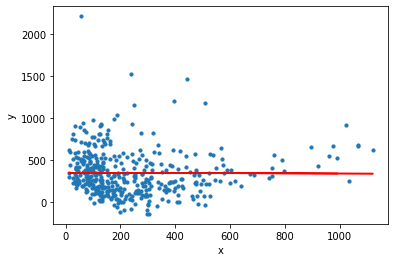

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#dataset
y = np.array(df2["Pred"])
x = np.array(df2["new"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# sckit-learn implementation
# Model initialization

regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

In [10]:
pre_data = df[:]
pre_data_new = pre_data['new']
pre_data_new = pre_data_new.values.reshape(-1,1)
na_data = (regression_model.predict(pre_data_new))#getting predicted values
na_data_series = pd.Series(na_data.ravel())
sata = na_data_series.to_frame()

In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv("GOLD.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [12]:
df['Pred'] = sata
df

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,342.702580,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,341.238649,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,342.582797,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,342.836517,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,342.747169,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,341.635810,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,343.240625,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,342.737786,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,343.272194,48.365693


In [13]:
df.isna()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
507,False,False,False,False,False,False,False,False,False
508,False,False,False,False,False,False,False,False,False
509,False,False,False,False,False,False,False,False,False
510,False,False,False,False,False,False,False,False,False


In [14]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,341.635810,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,343.240625,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,342.737786,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,343.272194,48.365693
511,"May 03, 2019",31341,31250,31500,31163,0.08K,0.44%,340.131646,429.924911


In [15]:
df.describe()

,Price,Open,High,Low,Pred,new
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,341.652399,245.161859
std,1284.378623,1296.856656,1307.031684,1271.936410,1.693813,205.788897
min,27812.000000,27805.000000,27887.000000,27620.000000,332.086862,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,341.029546,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,342.151390,184.537244
75%,31271.750000,31300.000000,31447.500000,31160.750000,342.835932,320.835031
max,33753.000000,34247.000000,34400.000000,33680.000000,343.578841,1407.321485


In [16]:
df.set_index('Date',inplace = True)
df

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,342.702580,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,341.238649,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,342.582797,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,342.836517,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,342.747169,112.153318
...,...,...,...,...,...,...,...,...
"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,341.635810,247.177322
"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,343.240625,52.201158
"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,342.737786,113.293305


Slope: [[-121.49444741]]
Intercept: [41754.03127127]
Root mean squared error:  1.2936701962559687e-23
R2 score:  1.0


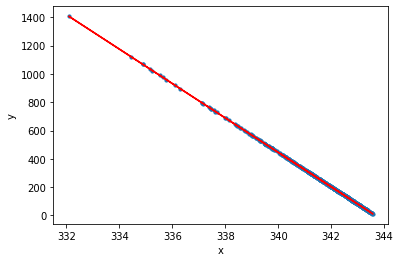

In [17]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#dataset
y = np.array(df["new"])
x = np.array(df["Pred"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# sckit-learn implementation
# Model initialization

regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

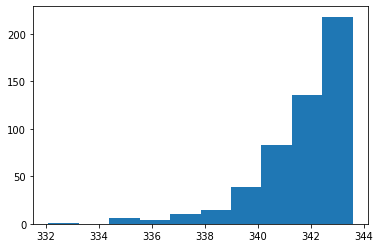

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df['Pred'])
plt.show()

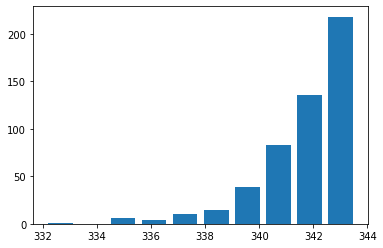

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df['Pred'],rwidth= 0.8)
plt.show()

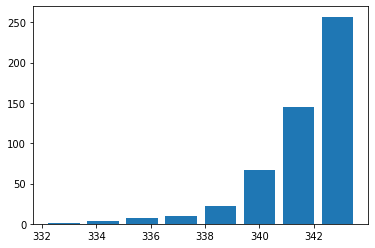

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df['Pred'],rwidth = 0.8,bins = 8)
plt.show()

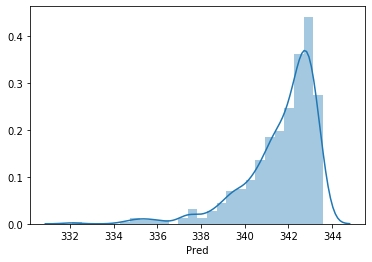

In [21]:
import seaborn as sns
sns.distplot(df['Pred'])
plt.show()

# Query 3.2

Import the stock of your choosing AND the Nifty index. Using linear regression (OLS), calculate - The daily Beta value for the past 3 months. (Daily= Daily returns) The monthly Beta value. (Monthly= Monthly returns) Refrain from using the (covariance(x,y)/variance(x)) formula. Attempt the question using regression.(Regression Reference) Were the Beta values more or less than 1 ? What if it was negative ? Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results

In [22]:
import pandas as pd
tcs_data = pd.read_csv('tcs_stock_data.csv')
tcs_data['Date'] = pd.to_datetime(tcs_data['Date'])
tcs_data = tcs_data.sort_values('Date')
tcs_data.set_index('Date', inplace=True)
tcs_data.head(10)

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-07-06,TCS,EQ,2356.00,2359.00,2361.90,2340.10,2350.05,2347.55,2348.75,513394,1.205835e+09,26826,342973,66.81
2017-07-07,TCS,EQ,2347.55,2350.00,2356.45,2325.50,2332.00,2331.95,2343.49,616045,1.443698e+09,52731,417958,67.85
2017-07-10,TCS,EQ,2331.95,2341.00,2444.90,2341.00,2435.00,2434.95,2426.54,398392,9.667144e+08,12486,188289,47.26
2017-07-11,TCS,EQ,2434.95,2426.00,2514.80,2426.00,2482.50,2475.80,2478.13,1768752,4.383195e+09,96054,937311,52.99
2017-07-12,TCS,EQ,2475.80,2482.50,2483.30,2430.10,2441.00,2439.45,2453.34,1323225,3.246316e+09,62259,926229,70.00
2017-07-13,TCS,EQ,2439.45,2445.00,2472.00,2426.60,2439.00,2446.40,2449.50,1565980,3.835873e+09,64700,819249,52.32
2017-07-14,TCS,EQ,2446.40,2383.00,2425.00,2375.00,2399.10,2397.45,2396.18,2254216,5.401499e+09,95561,853385,37.86
2017-07-17,TCS,EQ,2397.45,2397.70,2422.10,2382.20,2397.10,2395.45,2402.63,1105911,2.657095e+09,49251,668063,60.41
2017-07-18,TCS,EQ,2395.45,2396.15,2443.00,2396.15,2415.10,2408.35,2418.05,954001,2.306824e+09,67981,587896,61.62


In [23]:
tcs_data.tail()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2019-07-01,TCS,EQ,2227.20,2235.0,2255.0,2206.60,2233.05,2239.55,2237.15,2769940,6.196759e+09,129268,1579799,57.03
2019-07-02,TCS,EQ,2239.55,2244.9,2257.0,2216.45,2254.30,2252.10,2237.79,1771746,3.964797e+09,97184,816451,46.08
2019-07-03,TCS,EQ,2252.10,2252.2,2258.8,2232.00,2234.00,2237.65,2242.16,1656881,3.714997e+09,87941,739089,44.61
2019-07-04,TCS,EQ,2237.65,2234.0,2252.0,2230.10,2241.00,2242.65,2241.04,984140,2.205502e+09,59990,352899,35.86
2019-07-05,TCS,EQ,2242.65,2247.0,2250.0,2140.00,2166.85,2163.10,2179.39,4088470,8.910375e+09,160276,1736073,42.46


In [24]:
tcs_data.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02,4.950000e+02,495.000000,4.950000e+02,495.000000
mean,2365.776768,2364.439091,2389.739798,2340.637475,2365.129697,2365.387071,2365.536747,2.261750e+06,5.119670e+09,100423.989899,1.226152e+06,55.854788
std,465.059909,462.612829,471.726527,459.447602,464.695459,465.148930,466.162215,2.572893e+06,6.634098e+09,56619.297343,1.600848e+06,12.076135
min,1721.600000,1723.000000,1734.900000,1711.150000,1723.000000,1721.600000,1725.850000,4.341100e+04,1.120856e+08,2351.000000,1.386900e+04,21.480000
25%,1987.975000,1989.650000,2006.000000,1973.500000,1988.925000,1987.975000,1988.840000,1.039764e+06,2.716535e+09,57182.500000,5.900550e+05,47.040000
50%,2227.200000,2204.900000,2247.650000,2185.500000,2214.700000,2215.400000,2219.980000,1.834334e+06,4.196846e+09,94374.000000,9.388060e+05,55.300000
75%,2636.275000,2633.700000,2667.475000,2616.775000,2635.000000,2636.275000,2641.095000,2.750824e+06,5.920394e+09,132733.500000,1.514823e+06,65.550000
max,3603.700000,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000,3633.110000,4.403358e+07,1.268362e+11,482657.000000,3.155626e+07,85.180000


In [25]:
tcs_data.isna()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-07-06,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2017-07-07,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2017-07-10,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2017-07-11,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2017-07-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2019-07-02,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2019-07-03,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
df = tcs_data.dropna()

In [27]:
df


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-07-06,TCS,EQ,2356.00,2359.0,2361.90,2340.10,2350.05,2347.55,2348.75,513394,1.205835e+09,26826,342973,66.81
2017-07-07,TCS,EQ,2347.55,2350.0,2356.45,2325.50,2332.00,2331.95,2343.49,616045,1.443698e+09,52731,417958,67.85
2017-07-10,TCS,EQ,2331.95,2341.0,2444.90,2341.00,2435.00,2434.95,2426.54,398392,9.667144e+08,12486,188289,47.26
2017-07-11,TCS,EQ,2434.95,2426.0,2514.80,2426.00,2482.50,2475.80,2478.13,1768752,4.383195e+09,96054,937311,52.99
2017-07-12,TCS,EQ,2475.80,2482.5,2483.30,2430.10,2441.00,2439.45,2453.34,1323225,3.246316e+09,62259,926229,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-01,TCS,EQ,2227.20,2235.0,2255.00,2206.60,2233.05,2239.55,2237.15,2769940,6.196759e+09,129268,1579799,57.03
2019-07-02,TCS,EQ,2239.55,2244.9,2257.00,2216.45,2254.30,2252.10,2237.79,1771746,3.964797e+09,97184,816451,46.08
2019-07-03,TCS,EQ,2252.10,2252.2,2258.80,2232.00,2234.00,2237.65,2242.16,1656881,3.714997e+09,87941,739089,44.61


In [28]:
nifty_data = pd.read_csv('NIFTY50_Data.csv')
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
nifty_data = nifty_data.sort_values('Date')
nifty_data.set_index('Date', inplace=True)
nifty_data.head()

,Open,High,Low,Close
Date,,,,
2017-07-06,9653.60,9700.70,9639.95,9674.55
2017-07-07,9670.35,9684.25,9642.65,9665.80
2017-07-10,9719.30,9782.15,9646.45,9771.05
2017-07-11,9797.45,9830.05,9778.85,9786.05
2017-07-12,9807.30,9824.95,9787.70,9816.10


In [29]:
nifty_data.tail()

,Open,High,Low,Close
Date,,,,
2019-07-01,11839.90,11884.65,11830.80,11865.60
2019-07-02,11890.30,11917.45,11814.70,11910.30
2019-07-03,11932.15,11945.20,11887.05,11916.75
2019-07-04,11928.80,11969.25,11923.65,11946.75
2019-07-05,11964.75,11981.75,11797.90,11811.15


In [30]:
nifty_data.isna()

,Open,High,Low,Close
Date,,,,
2017-07-06,False,False,False,False
2017-07-07,False,False,False,False
2017-07-10,False,False,False,False
2017-07-11,False,False,False,False
2017-07-12,False,False,False,False
...,...,...,...,...
2019-07-01,False,False,False,False
2019-07-02,False,False,False,False
2019-07-03,False,False,False,False


In [31]:
df2 = nifty_data.dropna()

In [32]:
df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-07-06,TCS,EQ,2356.00,2359.0,2361.90,2340.1,2350.05,2347.55,2348.75,513394,1.205835e+09,26826,342973,66.81
2017-07-07,TCS,EQ,2347.55,2350.0,2356.45,2325.5,2332.00,2331.95,2343.49,616045,1.443698e+09,52731,417958,67.85
2017-07-10,TCS,EQ,2331.95,2341.0,2444.90,2341.0,2435.00,2434.95,2426.54,398392,9.667144e+08,12486,188289,47.26
2017-07-11,TCS,EQ,2434.95,2426.0,2514.80,2426.0,2482.50,2475.80,2478.13,1768752,4.383195e+09,96054,937311,52.99
2017-07-12,TCS,EQ,2475.80,2482.5,2483.30,2430.1,2441.00,2439.45,2453.34,1323225,3.246316e+09,62259,926229,70.00


In [33]:
df.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02,4.950000e+02,495.000000,4.950000e+02,495.000000
mean,2365.776768,2364.439091,2389.739798,2340.637475,2365.129697,2365.387071,2365.536747,2.261750e+06,5.119670e+09,100423.989899,1.226152e+06,55.854788
std,465.059909,462.612829,471.726527,459.447602,464.695459,465.148930,466.162215,2.572893e+06,6.634098e+09,56619.297343,1.600848e+06,12.076135
min,1721.600000,1723.000000,1734.900000,1711.150000,1723.000000,1721.600000,1725.850000,4.341100e+04,1.120856e+08,2351.000000,1.386900e+04,21.480000
25%,1987.975000,1989.650000,2006.000000,1973.500000,1988.925000,1987.975000,1988.840000,1.039764e+06,2.716535e+09,57182.500000,5.900550e+05,47.040000
50%,2227.200000,2204.900000,2247.650000,2185.500000,2214.700000,2215.400000,2219.980000,1.834334e+06,4.196846e+09,94374.000000,9.388060e+05,55.300000
75%,2636.275000,2633.700000,2667.475000,2616.775000,2635.000000,2636.275000,2641.095000,2.750824e+06,5.920394e+09,132733.500000,1.514823e+06,65.550000
max,3603.700000,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000,3633.110000,4.403358e+07,1.268362e+11,482657.000000,3.155626e+07,85.180000


In [34]:
fil_tcs = df[405:]
fil_nifty = df2[405:]

In [35]:
return_tcs = fil_tcs['Close Price'].pct_change()
return_nifty = fil_nifty['Close'].pct_change()

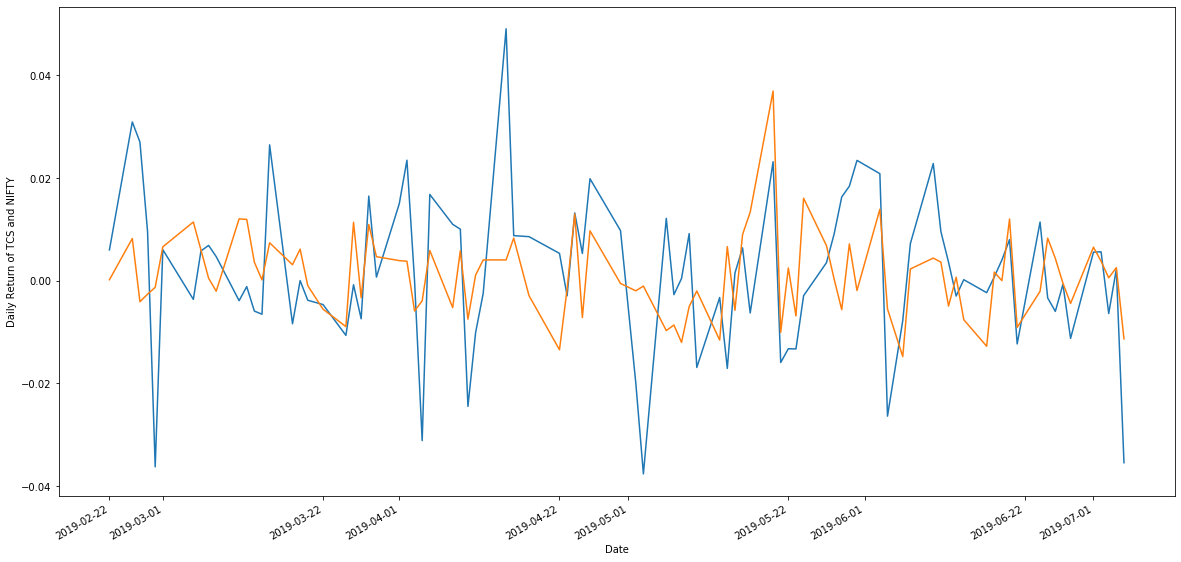

In [36]:
plt.figure(figsize=(20,10))
return_tcs.plot()
return_nifty.plot()
plt.ylabel("Daily Return of TCS and NIFTY")
plt.show()

In [37]:
fil_tcs['pct_change'] = fil_tcs['Close Price'].pct_change()
fil_nifty['pct_change'] = fil_nifty['Close'].pct_change()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
x = fil_tcs['pct_change'].dropna()
y = fil_nifty['pct_change'].dropna()
import pandas as pd 
import statsmodels.api as sm
myModel = sm.OLS(y,x).fit()
myModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             pct_change   R-squared (uncentered):                   0.129
Model:                            OLS   Adj. R-squared (uncentered):              0.119
Method:                 Least Squares   F-statistic:                              13.05
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                    0.000504
Time:                        07:22:57   Log-Likelihood:                          307.80
No. Observations:                  89   AIC:                                     -613.6
Df Residuals:                      88   BIC:                                     -611.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pct_change     0.1968      0.054      3.613      0.001       0.089       0.305
==============================================================================
Omnibus:                       14.792   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.676
Skew:                           0.699   Prob(JB):                     1.19e-05
Kurtosis:                       5.039   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
import pandas as pd
import statsmodels.api as sm

'''
Download monthly prices of TCS and NIFTY 50 for Time period: 1-Jan-2014--12-Jan-2017
'''
tcs = pd.read_csv('TCS.NS.csv', parse_dates=True, index_col='Date',)
nifty50 = pd.read_csv('^NSEI.csv', parse_dates=True, index_col='Date')

# joining the closing prices of the two datasets 
monthly_prices = pd.concat([tcs['Close'], nifty50['Close']], axis=1)
monthly_prices.columns = ['TCS', 'NIFTY50']

# check the head of the dataframe
print(monthly_prices.head())

# calculate monthly returns
monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)  # drop first missing row
print(clean_monthly_returns.head())

                    TCS       NIFTY50
Date                                 
2018-06-30          NaN           NaN
2018-07-31  2078.399902  11680.500000
2018-08-31  2183.699951  10930.450195
2018-09-30  1938.150024  10386.599609
2018-10-31  1968.250000  10876.750000
                 TCS   NIFTY50
Date                          
2018-08-31  0.050664 -0.064214
2018-09-30 -0.112447 -0.049756
2018-10-31  0.015530  0.047191
2018-11-30 -0.038207 -0.001306
2018-12-31  0.063944 -0.002909


In [42]:
# split dependent and independent variable
X = clean_monthly_returns['TCS']
y = clean_monthly_returns['NIFTY50']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                NIFTY50   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                    0.4814
Date:                Wed, 03 Jun 2020   Prob (F-statistic):              0.504
Time:                        07:26:08   Log-Likelihood:                 23.106
No. Observations:                  12   AIC:                            -42.21
Df Residuals:                      10   BIC:                            -41.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.011     -0.093      0.9

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
